<a href="https://colab.research.google.com/github/ralph27/Matplotlib-visualization/blob/master/SVMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Support Vector Machine**
© 2022, Zaka AI, Inc. All Rights Reserved.

---


**Objective:** In this exercise, we will train a Machine Learning Model using Support Vector Machine algorithm from the scikit library, to implement a classification model on a breast cancer dataset.

We will be classifying if a tumor is (2) Benign or (4) Malignant from these inputs:

*   Clump Thickness (1-10)
*   Uniformity of Cell Size (1-10)
*   Uniformity of Cell Shape (1-10)







# Importing Needed Libraries:

* numpy: for scientific computing
* matplotlib: for plotting and visualization
* pandas: for data reading and manipulation




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the Dataset

The Data is currently stored in a CSV file on a github repository:

In [ ]:
# clone git repo
!git clone https://github.com/zaka-ai/machine_learning_certification

# change working directory
%cd machine_learning_certification/

Cloning into 'machine_learning_certification'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 43 (delta 10), reused 10 (delta 1), pack-reused 0
Receiving objects: 100% (43/43), 43.23 MiB | 9.00 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Updating files: 100% (15/15), done.
/content/machine_learning_certification


In [ ]:
data = pd.read_csv('breast-cancer-wisconsin.csv') #Read the Data file
data.head() #Prints the first 5 rows of the data

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Benign (2) or Malignant (4)
0,1000025,5,1,1,2
1,1002945,5,4,4,2
2,1015425,3,1,1,2
3,1016277,6,8,8,2
4,1017023,4,1,1,2


# Number of Rows and Columns:
Let's dig and see the number of rows and columns in our data:

In [ ]:
n_rows = data.shape[0]
n_columns = data.shape[1]
print('There are ' + str(n_rows) + ' rows and ' + str(n_columns) + ' columns.')

There are 684 rows and 5 columns.


# Data Preprocessing:

Data preprocessing involves dividing the data into features/attributes and labels, and then we will move to divide them into training and testing sets.

In [ ]:
x = data.drop(['Benign (2) or Malignant (4)', 'ID'], axis = 1) #all the columns except the ID and Class columns are being stored as input
y = data['Benign (2) or Malignant (4)']

Now we will split our data between training and testing by using the scikit learn library.

In [ ]:
#Scikit-Learn Library contains the train_test_split method that allows the division of data into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20) #20% of the data is assigned for testing, and the rest for training

# Training the Algorithm: Linear SVM
To train the SVM on the training data, we will use scikit-learn's svm library. This class takes the kernel type as parameter, and as a start we will use a 'linear' kernel for simplicity to see if we can seperate the data linearly, keeping non-linear kernels for the next section.

SVC stands for Support Vector Classifier.

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel = 'linear')
svclassifier.fit(x_train, y_train) #"fit" is called to train the algorithm on the training data

SVC(kernel='linear')

# Predictions:
In order to make predictions, we will use "predict" from the svc class:

In [ ]:
y_pred = svclassifier.predict(x_test)

# Evaluating our Algorithm
We will be using an accuracy based metric to evaluate our algorithm:

In [ ]:
from sklearn.metrics import accuracy_score
print ("Our model predicts the test set with " + str( 100*accuracy_score(y_test,y_pred) ) +"% accuracy")

Our model predicts the test set with 94.8905109489051% accuracy


# Plotting the SVM:
We will be using the matplotlib.pyplot library to plot the results of our predictions on the test set with the decision boundary:

The form of the decision boundary in an SVM Classification would be of the form a0 + a1 x + a2 y +a3 z = 0

Given that the 3 features x, y, and z are respectively the "Clump Thickness" "Uniformity of Cell Size" and the "Uniformity of Cell Shape".

To draw this equation, we will change its form to be: z = a x + by + c
<br>Where:

*   a = -a1/a3
*   b = -a2/a3
*   c = -a0/a3



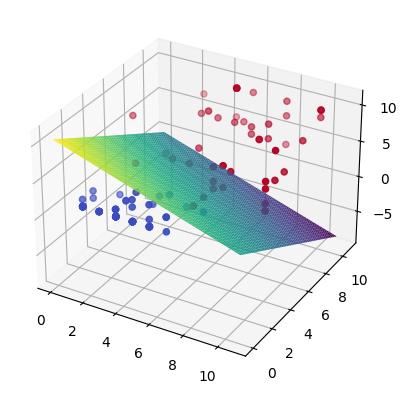

In [ ]:
#Capture the coefficients of the features x, and y (which are a1, and a2)
coefficients = svclassifier.coef_[0]

#Get the intercept (which is a0)
intercept = svclassifier.intercept_[0]

a0 = intercept
a1 = coefficients[0] # The 1st feature : Clump Thickness
a2 = coefficients[1] # The 2nd feature : Uniformity of Cell Size
a3 = coefficients[2] # The 3rd feature : Uniformity of Cell Shape

a = -a1/a3
b = -a2/a3
c = -a0/a3

fig = plt.figure()
ax = plt.axes(projection='3d') #note: we're plotting in a 3D space

#Plot the dataPoints
data_x = np.array(x_test)[:,0] # Clump Thickness
data_y = np.array(x_test)[:,1] # Uniformity of Cell Size
data_z = np.array(x_test)[:,2] # Uniformity of Cell Shape
ax.scatter3D(data_x, data_y, data_z, c=y_pred, cmap=plt.cm.coolwarm)

#Now we will plot z = ax + by + c (the separator / decision boundary - aka the model - learned by the SVC algorithm)
x_min, x_max = data_x.min() - 1, data_x.max() + 1
y_min, y_max = data_y.min() - 1, data_y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .2), np.arange(y_min, y_max, .2))
zz = a*xx + b*yy + c

ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, cmap='viridis', edgecolor='none' )

As seen above, the data is clearly linearly seperable.

#Non Linear SVM

In this example, we will explore non linear SVMs with a similar example to the one we explored in the course lessons. For this purpose, we will generate some data using the make_circles function from the sklearn library.
* The n_samples parameter indicates the number of points we are generating
* The Factor parameter indicates how far the 2 classes should be from each other
* The noise parameter indicates how much the 2 classes are separated

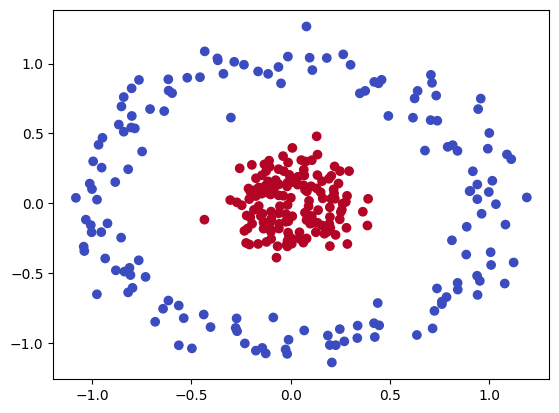

In [ ]:
from sklearn.datasets import make_circles

X, Y = make_circles(n_samples = 300 ,factor = 0.2, noise=0.1) # X is the features and Y is the labels
x1 = X[:,0] # data reading for 1st dimension
x2 = X[:,1] # data reading for 2nd dimension
plt.scatter(x1, x2, c=Y, cmap = plt.cm.coolwarm)

As clear, the data is not linearly separable, this is why, as we did in the class, we will add a new dimension: <br> <img src="https://equatio-api.texthelp.com/svg/z%3Dx_1%5E2%2Bx_2%5E2" alt="z equals x sub 1 squared plus x sub 2 squared">

Now, we will visualize our data in 3 dimensions.

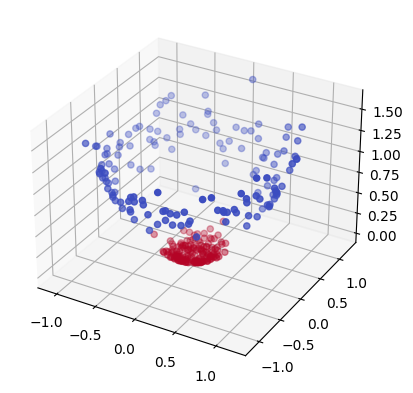

In [ ]:
z = x1**2 + x2**2

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(x1, x2, z, c=Y, cmap = plt.cm.coolwarm)

Now, we will fit a linear SVM to the NOW linearly separable data in the new space.

To do so, we will add the dimension z that we created to our features.

In [ ]:
Features = np.vstack((x1,x2,z))
Target = Y

#Splitting between training and testing
x_train, x_test, y_train, y_test = train_test_split(Features.T, Target, test_size = 0.2)

Train the classifier.

In [ ]:
svmClassifier = SVC(kernel = 'linear')
svmClassifier.fit(x_train, y_train)

SVC(kernel='linear')

Visualize the separation plane that has an equation:
<br><img src="https://equatio-api.texthelp.com/svg/a_0%2Ba_1%5Ccdot%20x_1%5E%7B%20%7D%2Ba_2%5Ccdot%20x_2%5E%7B%20%7D%2Ba_3.z%3D0" alt="a. sub 0 plus a. sub 1 times x sub 1 raised to the power plus a. sub 2 times x sub 2 raised to the power plus a. sub 3 period z equals 0">
<br>Or more commonly <br><img src="https://equatio-api.texthelp.com/svg/z%5C%20%3D%5C%20a%5Ccdot%20x_1%2Bb%5Ccdot%20x_2%2Bc" alt="z equals a. times x sub 1 plus b times x sub 2 plus c">


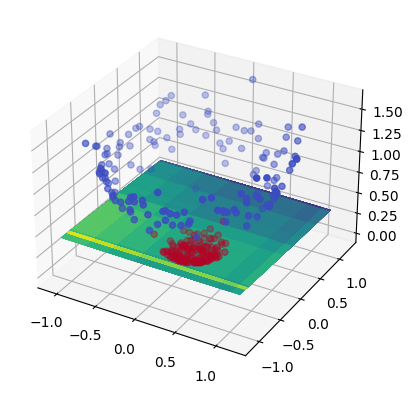

In [ ]:
#Plot the data points
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x2, z, c=Y, cmap = plt.cm.coolwarm)

intercept = svmClassifier.intercept_[0]
coefficients = svmClassifier.coef_[0]


a1 = coefficients [0]
a2 = coefficients [1]
a3 = coefficients [2]
a0 = intercept

a = -a1/a3
b = -a2/a3
c = -a0/a3

X1, X2 = np.meshgrid(x1, x2)
Z = a * X1 + b * X2 + c

#plot the hyperplane
ax.plot_surface(X1, X2, Z, cmap=plt.cm.viridis)

Accuracy Score

In [ ]:
y_pred = svmClassifier.predict(x_test)
print("Accuracy is ", str(accuracy_score(y_test, y_pred)*100), "%")

Accuracy is  100.0 %


Now we will plot it in 2D. To do so, we will take the mean value of Z as the radius.

We know the equation of a circle in the center of a 2 dimensional space is:<br>
<img src="https://equatio-api.texthelp.com/svg/x_%7B%20%7D%5E2%2By%5E2%5C%20%3Dr%5E2" alt="x sub squared plus y squared equals r squared">



This equation can be written as a set of 2 equations.

<img src="https://equatio-api.texthelp.com/svg/%5Cleft%5C%7B%5Cbegin%7Bmatrix%7Dy_1%3D%2B%5Csqrt%7Br%5E2-x%5E2%7D%5C%5C%0D%0Ay_2%3D-%5Csqrt%7Br%5E2-x%5E2%7D%5Cend%7Bmatrix%7D%5Cright%5C%7D" alt="the 2 by 1 column matrix Row 1: y sub 1 equals positive the square root of r squared minus x squared Row 2: y sub 2 equals the negative square root of r squared minus x squared">

<ipython-input-17-20f98c369042>:4: RuntimeWarning: invalid value encountered in sqrt
  y_circle_1 = np.sqrt(radius_square - x_range**2)
<ipython-input-17-20f98c369042>:5: RuntimeWarning: invalid value encountered in sqrt
  y_circle_2 = -np.sqrt(radius_square - x_range**2)


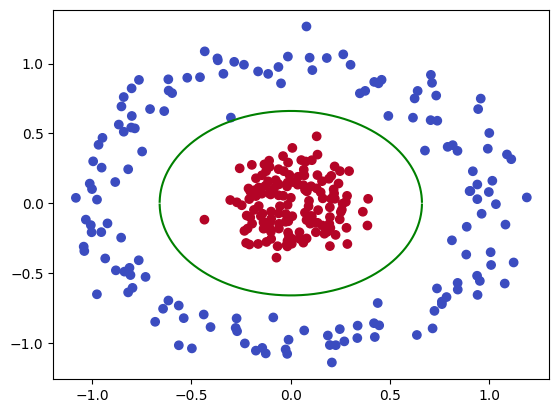

In [ ]:
radius_square = Z[0].mean()
x_range = np.arange(-1,1,0.0001)

y_circle_1 = np.sqrt(radius_square - x_range**2)
y_circle_2 = -np.sqrt(radius_square - x_range**2)

plt.scatter(x1, x2, c=Y, cmap = plt.cm.coolwarm)
plt.plot(x_range, y_circle_1, c='g')
plt.plot(x_range, y_circle_2, c='g')

#SVM Kernels

One thing to note in the above example, is that when the number of features increases, we will have expenses in computation because we will be transforming each feature alone. This is why we use kernels, where we directly classify without having to transform the data explicitly like we did.

So whenever your data is not linearly separable, and you need a complicated decision boundary, the Kernels will help you do so in an easy way.

Let's solve the previous example without adding a new features, and letting the kernels take this in consideration.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

To specify the kernel we need, we just put in the kernel parameter of the SVC.
There are several kernels. The most famous ones are 'RBF', 'Polynomial', etc.

In [ ]:
svmclassifier = SVC(kernel='rbf') #we choose a Gaussian radial-basis function (RBF) kernel
svmclassifier.fit(x_train, y_train)

SVC()

In [ ]:
y_pred = svmclassifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[28  0]
 [ 0 32]]


No errors were made by this kernel.
Now we will plot the regions to understand more what it did.

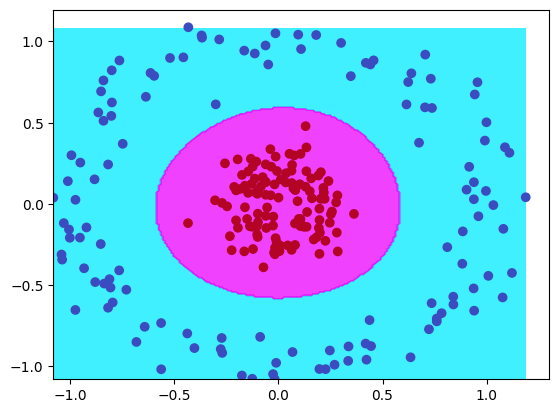

In [ ]:
#First, we create the meshgrid.
x1_min = np.min(x_train[:,0])
x1_max = np.max(x_train[:,0])
x2_min = np.min(x_train[:,1])
x2_max = np.max(x_train[:,1])
dim1, dim2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),np.arange(x2_min, x2_max, 0.01))

#predict the classes according to regions
Z = svmclassifier.predict(np.c_[dim1.ravel(), dim2.ravel()])

Z = Z.reshape(dim1.shape)

plt.contourf(dim1, dim2, Z, cmap=plt.cm.cool, alpha=0.8) #plotting the separator / decision boundary
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap = plt.cm.coolwarm) #plotting the data points



These are the surfaces ocuupied by each of the classes.